In [26]:
import json

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
data_path = "../data.json"
classes = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
with open(data_path, "r") as fp:
        data = json.load(fp)

 # convert lists to numpy arrays
X = np.array(data["mfcc"])
y = np.array(data["labels"])
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state = 42)

print(X_train.shape)
print(y_train.shape)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

(7988, 130, 13, 1)
(7988,)


In [29]:
from keras.src.callbacks import ModelCheckpoint
from models.genre_first_models import CNNG1

model_wrapper = CNNG1(input_shape=input_shape, output_shape=len(classes))
model_wrapper.create_model()

checkpoint = ModelCheckpoint(filepath="../genre_models/gtzan_models/gtzan_cnng1.keras", monitor='val_accuracy', verbose=1, mode="max", save_best_only=True,
                             save_weights_only=False)

history = model_wrapper.model.fit(X_train, y_train, epochs=30, batch_size=32, shuffle=True, validation_data=(X_test, y_test),
                        callbacks=[checkpoint])

model_wrapper.model.save("../genre_models/gtzan_models/gtzan_cnng1.keras")

C:\Proiecte SSD\Licenta\Basic-Fourier-Usage\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 62, 4, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 31, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 30, 1, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 15, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,514 (177.79 KB)

 Trainable params: 45,322 (177.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1825 - loss: 2.6047
Epoch 1: val_accuracy improved from -inf to 0.39590, saving model to ../genre_models/gtzan_models/gtzan_cnng1.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1828 - loss: 2.6034 - val_accuracy: 0.3959 - val_loss: 1.7139
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3789 - loss: 1.8017
Epoch 2: val_accuracy improved from 0.39590 to 0.47898, saving model to ../genre_models/gtzan_models/gtzan_cnng1.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3789 - loss: 1.8014 - val_accuracy: 0.4790 - val_loss: 1.4401
Epoch 3/30
246/250 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4606 - loss: 1.5578
Epoch 3: val_accuracy improved from 0.47898 to 0.52653, saving model to ../genre_models/gtzan_models/gtzan_cnng1.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4604 - loss: 1.5575 - val_accuracy: 0.5265 - val_loss: 1.3230
Epoch 4/30
246/250 ━━━━━━━━━━━━━━━━━

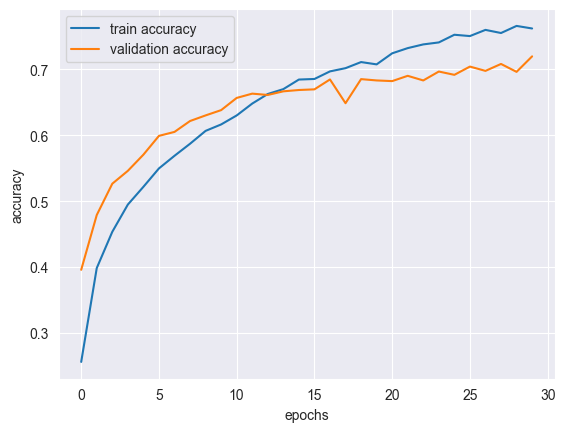

In [30]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

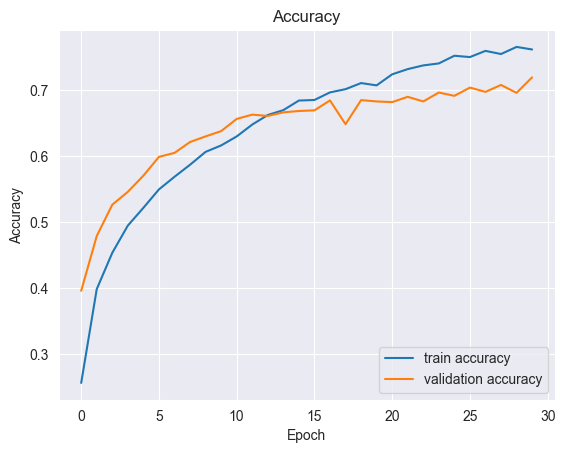

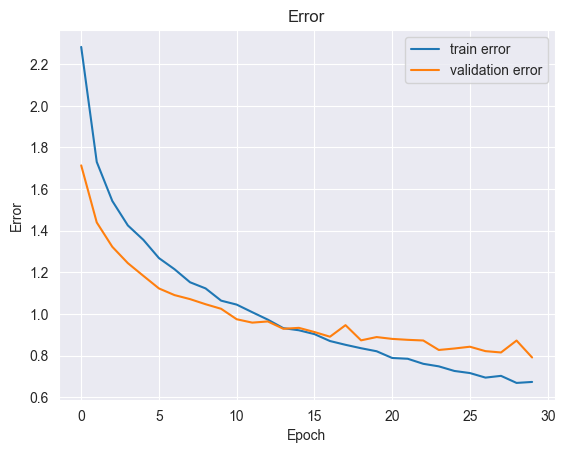

In [31]:
model_wrapper.plot_history(history)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy :  0.7197197197197197
[1 3 8 ... 0 2 6]
[1 3 8 ... 0 2 6]


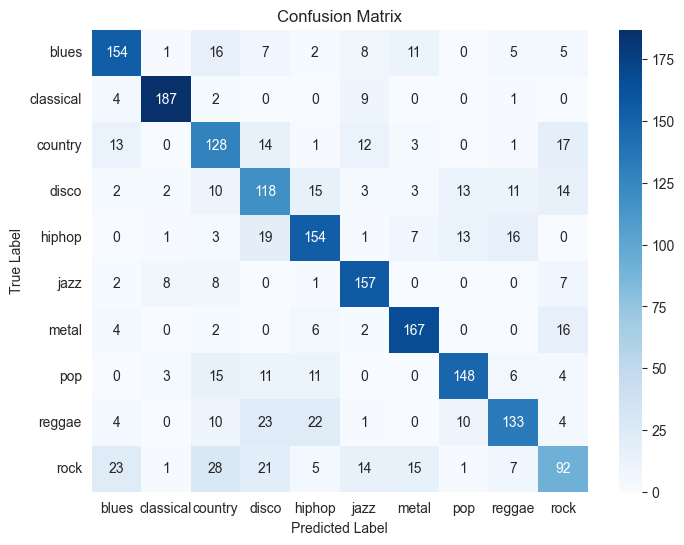

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [32]:
from keras.src.utils import to_categorical
from sklearn.metrics import recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns
y_pred = model_wrapper.model.predict(X_test)

y_pred_f = []
for y_val in y_pred:
    l = np.argmax(y_val)
    y_pred_f.append(l)
y_pred_f = np.array(y_pred_f)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_f)
print("Accuracy : ", accuracy)
print(y_test)
print(y_pred_f)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_f)



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Recall: ", recall_score(y_test, y_pred,average=None))
print("Precision: ", precision_score(y_test, y_pred,average=None))
print("F1-Score: ", f1_score(y_test, y_pred, average=None))